In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
df = pd.read_csv("D:/data ANALYTICS AND SCIENCE/ MARKETING Analytics/files/week 2-consumer want/Session 5/switching.csv")
df

,Slno,MF,Age,ProfessionBusiness,UrbanRural,RecipientOperator,SI,SwBh,Servqual,Sat,PSB,ESB,OSB,Price,SInt
0,1,Male,35,Employee,Rural,Vodafone,4,1,3.159848,2.873711,2.801641,1.662524,3.550406,5.000000,5.590945
1,2,Male,23,Employee,Rural,Idea,4,1,2.605907,3.021907,2.955598,2.476577,3.550406,4.829190,6.000000
2,3,Male,42,Employee,Urban,Airtel,5,1,3.513677,2.862113,4.687259,3.092256,4.329085,5.193264,5.409055
3,4,Male,28,Employee,Urban,Vodafone,5,1,3.959897,1.413660,5.332529,4.628107,3.772113,5.199679,6.409055
4,5,Male,34,Business,Rural,Idea,5,1,6.084887,2.988402,5.000000,2.290631,4.329085,4.981556,5.409055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,406,Male,19,Student,Rural,Vodafone,4,0,5.842008,4.412371,5.019788,4.628107,4.638470,4.440257,2.590945
405,407,Female,32,Unemployed,Rural,Idea,4,0,6.418139,4.251289,5.000000,4.243786,3.326767,4.222133,3.000000
406,408,Male,36,Employee,Urban,IDEA,4,0,5.864198,4.481959,3.977799,2.662524,3.767478,4.833200,3.000000
407,409,Male,40,Farmer,Rural,Idea,5,0,6.197450,3.448454,3.153958,3.489006,3.793743,4.222133,2.409055


In [2]:
# Preprocess the data
df = pd.get_dummies(df, columns=['MF', 'ProfessionBusiness', 'UrbanRural', 'RecipientOperator'])
df

,Slno,Age,SI,SwBh,Servqual,Sat,PSB,ESB,OSB,Price,...,RecipientOperator_Aircel,RecipientOperator_Airtel,RecipientOperator_IDEA,RecipientOperator_Idea,RecipientOperator_Reliance,RecipientOperator_TATA DOCOMO,RecipientOperator_Tata Cdma,RecipientOperator_Tata Docomo,RecipientOperator_Videocon,RecipientOperator_Vodafone
0,1,35,4,1,3.159848,2.873711,2.801641,1.662524,3.550406,5.000000,...,0,0,0,0,0,0,0,0,0,1
1,2,23,4,1,2.605907,3.021907,2.955598,2.476577,3.550406,4.829190,...,0,0,0,1,0,0,0,0,0,0
2,3,42,5,1,3.513677,2.862113,4.687259,3.092256,4.329085,5.193264,...,0,1,0,0,0,0,0,0,0,0
3,4,28,5,1,3.959897,1.413660,5.332529,4.628107,3.772113,5.199679,...,0,0,0,0,0,0,0,0,0,1
4,5,34,5,1,6.084887,2.988402,5.000000,2.290631,4.329085,4.981556,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,406,19,4,0,5.842008,4.412371,5.019788,4.628107,4.638470,4.440257,...,0,0,0,0,0,0,0,0,0,1
405,407,32,4,0,6.418139,4.251289,5.000000,4.243786,3.326767,4.222133,...,0,0,0,1,0,0,0,0,0,0
406,408,36,4,0,5.864198,4.481959,3.977799,2.662524,3.767478,4.833200,...,0,0,1,0,0,0,0,0,0,0
407,409,40,5,0,6.197450,3.448454,3.153958,3.489006,3.793743,4.222133,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# Split the data into training and testing sets
X = df.drop(['SwBh'], axis=1)
y = df['SwBh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test

(     Slno  Age  SI  Servqual       Sat       PSB       ESB       OSB  \
 41     42   30   4  5.010490  1.448454  2.354730  4.628107  3.550406   
 235   236   22   4  5.288066  4.699742  4.687259  3.906310  4.638470   
 371   372   28   4  5.672154  4.664948  4.156371  2.662524  4.845500   
 203   204   30   3  3.597595  4.826031  5.000000  5.104685  3.550406   
 216   217   25   3  4.813604  2.161082  3.665058  5.000000  2.692159   
 ..    ...  ...  ..       ...       ...       ...       ...       ...   
 299   300   27   5  5.480110  4.412371  5.156371  3.720363  5.221321   
 22     23   30   5  5.010490  3.573454  5.843629  2.476577  3.550406   
 72     73   30   5  3.165900  3.837629  5.843629  2.476577  3.767864   
 15     16   38   3  3.165900  4.036082  5.843629  3.767208  2.972190   
 168   169   36   4  2.953684  4.826031  5.843629  2.476577  3.767864   
 
         Price      SInt  ...  RecipientOperator_Aircel  \
 41   5.417803  6.000000  ...                         0   
 235

In [10]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.43308914,  0.8861528 , -0.06823507, ...,  2.50333111,
        -0.1246112 , -0.75638309],
       [ 1.70122641,  0.8861528 ,  0.9942824 , ..., -0.39946773,
        -0.1246112 , -0.75638309],
       [-0.37683741, -1.08114888,  0.9942824 , ..., -0.39946773,
        -0.1246112 ,  1.32208137],
       ...,
       [ 0.62867734,  1.46477094, -0.06823507, ...,  2.50333111,
        -0.1246112 , -0.75638309],
       [ 0.60353947, -0.15535986,  0.9942824 , ..., -0.39946773,
        -0.1246112 , -0.75638309],
       [-0.92987052, -0.84970162,  0.9942824 , ...,  2.50333111,
        -0.1246112 , -0.75638309]])

In [11]:
# Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [13]:
# Perform feature selection based on coefficients
coefficients = logreg.coef_[0]
sorted_coefficients = sorted(list(zip(X_train.columns, coefficients)), key=lambda x: x[1])
sorted_coefficients

[('Sat', -0.7676060638459722),
 ('Servqual', -0.6063370532331266),
 ('Slno', -0.5166072348107478),
 ('RecipientOperator_Tata Docomo', -0.3109678578214069),
 ('ProfessionBusiness_Farmer', -0.24547391750940276),
 ('RecipientOperator_Idea', -0.23316336092469886),
 ('OSB', -0.21592838762637018),
 ('UrbanRural_Urban', -0.19475934167497636),
 ('ProfessionBusiness_Student', -0.1681347958293489),
 ('MF_Female', -0.1588708145773258),
 ('RecipientOperator_Tata Cdma', -0.07633218894024837),
 ('ProfessionBusiness_Business', -0.03142246922100543),
 ('RecipientOperator_Aircel', -0.016412000695840766),
 ('RecipientOperator_IDEA', 0.042998917797736715),
 ('SI', 0.0636808279278571),
 ('RecipientOperator_Airtel', 0.06800552089430206),
 ('ProfessionBusiness_Unemployed', 0.06943806606160086),
 ('RecipientOperator_TATA DOCOMO', 0.0808230014906384),
 ('ESB', 0.1588257607205617),
 ('MF_Male', 0.15887081457732585),
 ('ProfessionBusiness_Govt Employee', 0.190009823567283),
 ('UrbanRural_Rural', 0.1947593416749

In [22]:
# Convert the scaled training data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df 

,Slno,Age,SI,Servqual,Sat,PSB,ESB,OSB,Price,SInt,...,RecipientOperator_Aircel,RecipientOperator_Airtel,RecipientOperator_IDEA,RecipientOperator_Idea,RecipientOperator_Reliance,RecipientOperator_TATA DOCOMO,RecipientOperator_Tata Cdma,RecipientOperator_Tata Docomo,RecipientOperator_Videocon,RecipientOperator_Vodafone
0,-1.373973,-0.271083,-0.068235,0.386612,-2.628835,-1.565771,1.114390,-0.345777,0.191706,1.410511,...,-0.147902,1.969923,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,-0.756383
1,0.251609,-1.196873,-0.068235,0.581403,0.742505,0.323463,0.463634,0.757307,-0.950958,-0.834468,...,-0.147902,-0.507634,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,1.322081
2,1.391193,-0.502531,-0.068235,0.850938,0.706427,-0.106530,-0.657734,0.967195,-0.568804,-0.834468,...,-0.147902,-0.507634,-0.186575,1.951621,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,-0.756383
3,-0.016528,-0.271083,-1.130753,-0.604892,0.873457,0.576768,1.544061,-0.345777,0.725810,0.492192,...,-0.147902,-0.507634,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,1.322081
4,0.092403,-0.849702,-1.130753,0.248447,-1.889892,-0.504469,1.449680,-1.215870,-0.938802,-0.256135,...,-0.147902,-0.507634,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,1.322081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.787884,-0.618254,0.994282,0.716170,0.444523,0.703421,0.295989,1.348203,-0.941081,-0.222255,...,-0.147902,-0.507634,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,1.322081
323,-1.533179,-0.271083,0.994282,0.386612,-0.425371,1.260067,-0.825379,-0.345777,0.371006,0.968291,...,-0.147902,1.969923,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,-0.756383
324,-1.114215,-0.271083,0.994282,-0.907836,-0.151441,1.260067,-0.825379,-0.125317,0.743284,-0.222255,...,-0.147902,-0.507634,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,1.322081
325,-1.591834,0.654706,-1.130753,-0.907836,0.054341,1.260067,0.338224,-0.931974,0.536632,-0.256135,...,-0.147902,1.969923,-0.186575,-0.512395,-0.096225,-0.055385,-0.055385,-0.399468,-0.124611,-0.756383


In [23]:
y_train_pred = logreg.predict(X_train_scaled)
print(metrics.classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.96      0.94      0.95       167
           1       0.94      0.96      0.95       160

    accuracy                           0.95       327
   macro avg       0.95      0.95      0.95       327
weighted avg       0.95      0.95      0.95       327



In [25]:
# Select the desired features
selected_features = ['Slno', 'SI', 'PSB', 'ESB', 'OSB', 'ProfessionBusiness_Employee', 'ProfessionBusiness_Farmer', 'ProfessionBusiness_Student', 'ProfessionBusiness_Unemployed', 'RecipientOperator_Airtel', 'RecipientOperator_Idea', 'RecipientOperator_Reliance', 'RecipientOperator_Videocon', 'RecipientOperator_Vodafone', 'UrbanRural_Urban']
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns)[selected_features]
X_train_final

,Slno,SI,PSB,ESB,OSB,ProfessionBusiness_Employee,ProfessionBusiness_Farmer,ProfessionBusiness_Student,ProfessionBusiness_Unemployed,RecipientOperator_Airtel,RecipientOperator_Idea,RecipientOperator_Reliance,RecipientOperator_Videocon,RecipientOperator_Vodafone,UrbanRural_Urban
0,-1.373973,-0.068235,-1.565771,1.114390,-0.345777,-0.639908,-0.469201,-0.464342,-0.203473,1.969923,-0.512395,-0.096225,-0.124611,-0.756383,-0.545545
1,0.251609,-0.068235,0.323463,0.463634,0.757307,-0.639908,-0.469201,-0.464342,4.914656,-0.507634,-0.512395,-0.096225,-0.124611,1.322081,-0.545545
2,1.391193,-0.068235,-0.106530,-0.657734,0.967195,1.562724,-0.469201,-0.464342,-0.203473,-0.507634,1.951621,-0.096225,-0.124611,-0.756383,-0.545545
3,-0.016528,-1.130753,0.576768,1.544061,-0.345777,1.562724,-0.469201,-0.464342,-0.203473,-0.507634,-0.512395,-0.096225,-0.124611,1.322081,1.833030
4,0.092403,-1.130753,-0.504469,1.449680,-1.215870,1.562724,-0.469201,-0.464342,-0.203473,-0.507634,-0.512395,-0.096225,-0.124611,1.322081,-0.545545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0.787884,0.994282,0.703421,0.295989,1.348203,1.562724,-0.469201,-0.464342,-0.203473,-0.507634,-0.512395,-0.096225,-0.124611,1.322081,-0.545545
323,-1.533179,0.994282,1.260067,-0.825379,-0.345777,1.562724,-0.469201,-0.464342,-0.203473,1.969923,-0.512395,-0.096225,-0.124611,-0.756383,-0.545545
324,-1.114215,0.994282,1.260067,-0.825379,-0.125317,-0.639908,-0.469201,2.153586,-0.203473,-0.507634,-0.512395,-0.096225,-0.124611,1.322081,1.833030
325,-1.591834,-1.130753,1.260067,0.338224,-0.931974,1.562724,-0.469201,-0.464342,-0.203473,1.969923,-0.512395,-0.096225,-0.124611,-0.756383,-0.545545


In [26]:
# Refit the logistic regression model with selected features
logreg_selected = LogisticRegression(max_iter=1000)
logreg_selected.fit(X_train_final, y_train)

LogisticRegression(max_iter=1000)

In [27]:
# Predict using the refitted logistic regression model with selected features
y_train_pred_selected = logreg_selected.predict(X_train_final)
y_train_pred_selected

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,

In [28]:
# Print the classification report for the refitted model
print("Classification Report for the Refitted Model:")
print(metrics.classification_report(y_train, y_train_pred_selected))


Classification Report for the Refitted Model:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       167
           1       0.94      0.95      0.94       160

    accuracy                           0.94       327
   macro avg       0.94      0.95      0.94       327
weighted avg       0.95      0.94      0.94       327



In [29]:
# Scale the testing data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled testing data back to DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Select the desired features for the testing set
X_test_final = X_test_scaled_df[selected_features]

# Predict using the refitted logistic regression model with selected features on the testing set
y_test_pred_selected = logreg_selected.predict(X_test_final)

# Print the classification report for the testing set
print("Classification Report for the Testing Set:")
print(metrics.classification_report(y_test, y_test_pred_selected))


Classification Report for the Testing Set:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.91      0.98      0.94        41

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



In [31]:
# Predict probabilities for the testing set
y_test_pred_prob = logreg_selected.predict_proba(X_test_final)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_test_pred_prob)
print("AUC Score:", auc_score)


AUC Score: 0.9649018441403927


**An AUC score of 0.9649 indicates that the logistic regression model with selected features performs well in distinguishing between the classes (switching behavior: 0 and 1) in the testing set. The higher the AUC score, the better the model's predictive ability**

In [36]:
# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_test_pred_selected)

print("Accuracy:", accuracy)

Accuracy: 0.9390243902439024


**An accuracy score of 0.9390 indicates that the logistic regression model with selected features has an overall accuracy of approximately 93.90%. This means that the model correctly predicts the switching behavior (0 or 1) for about 93.90% of the instances in the testing set.**

In [40]:
# Calculate precision
precision = metrics.precision_score(y_test, y_test_pred_selected)

print("Precision:", precision)

Precision: 0.9090909090909091


**A precision score of 0.9091 indicates that the logistic regression model with selected features correctly predicts approximately 90.91% of the instances as belonging to the positive class (switching behavior) out of all instances predicted as positive. In other words, when the model predicts that a customer will switch, it is correct about 90.91% of the time.**

In [41]:
# Calculate precision
recall = metrics.recall_score(y_test, y_test_pred_selected)

print("Recall:",recall)

Recall: 0.975609756097561


**A recall score of 0.9756 indicates that the logistic regression model with selected features correctly identifies approximately 97.56% of the actual positive instances (customers who actually switched) in the testing set. In other words, the model has a high ability to capture the positive instances and avoid false negatives.**

In [42]:
# Calculate F1 score
f1_score = metrics.f1_score(y_test, y_test_pred_selected)

print("F1 Score:", f1_score)


F1 Score: 0.9411764705882352


**An F1 score of 0.9412 indicates a good balance between precision and recall for the logistic regression model with selected features. It considers both the ability of the model to correctly identify positive instances (precision) and the ability to capture a large portion of actual positive instances (recall). A higher F1 score indicates better overall performance in terms of correctly identifying positive cases while minimizing false positives and false negatives.**

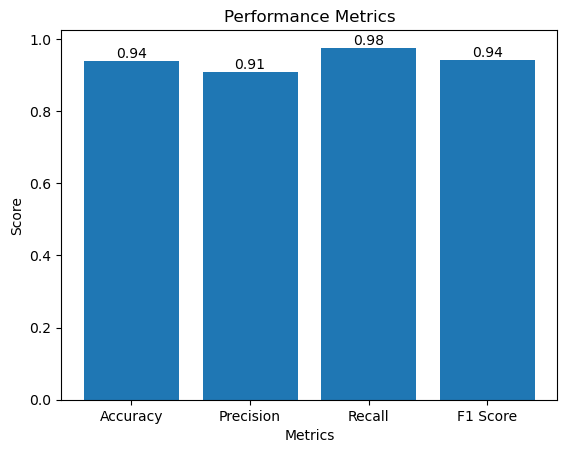

In [45]:
# plotting a bar graph to visualize the performance metrics

import matplotlib.pyplot as plt

# Calculate the performance metrics
accuracy = metrics.accuracy_score(y_test, y_test_pred_selected)
precision = metrics.precision_score(y_test, y_test_pred_selected)
recall = metrics.recall_score(y_test, y_test_pred_selected)
f1_score = metrics.f1_score(y_test, y_test_pred_selected)

# Create a dictionary to store the metric names and values
metrics_dict = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
}

# Plot the metrics as a bar graph
plt.bar(metrics_dict.keys(), metrics_dict.values())
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')

# Add labels on the bars
for metric, score in metrics_dict.items():
    plt.text(metric, score, str(round(score, 2)), ha='center', va='bottom')

plt.show()

